In [2]:
name = "КорнеевАлександр" # Ваши ФамилияИмя

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in name.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


 # Задача 1

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
import os
import re

def convert_text(s):
    # Removes all characters from string except letters and digits and convert letters to lowercase
    return re.sub("[^a-zA-Z0-9]", " ", s.lower())

def read_texts(dir_path="./Downloads/9sem_data/beatles/"):
    # Reads all files from directory
    if dir_path[-1] != "/":
        dir_path = dir_path + "/"
    txt_list = []
    for file in os.listdir(dir_path):
        file = dir_path + file
        fin = open(file, 'r')
        txt = ' '.join(fin.readlines())
        txt = convert_text(txt)
        txt_list.append(txt)
    return txt_list

In [5]:
neg = read_texts("/home/alex/IAD Sem/txt_sentoken/neg")
pos = read_texts("/home/alex/IAD Sem/txt_sentoken/pos")

**Texts - лист с текстами рецензий **

In [6]:
Texts = neg + pos

In [7]:
len(Texts)

2000

**Ans - ответы. -1 - негативная рецензия. 1 - положительная рецензия **

In [8]:
Ans = list()
for i in range(0,1000):
    Ans.append(-1)
for i in range(0,1000):
    Ans.append(1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(Texts,Ans,test_size=0.3,random_state = 12345)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [11]:
vectorizer = TfidfVectorizer(lowercase=True,ngram_range=(1,1))

In [12]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [13]:
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
FiveNN = KNeighborsClassifier(n_neighbors=5)
LogReg = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345)
MNB = MultinomialNB(alpha=1.0)

In [15]:
FiveNN.fit(X_train_tfidf,y_train)
LogReg.fit(X_train_tfidf,y_train)
MNB.fit(X_train_tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
fnn_pred = FiveNN.predict(X_test_tfidf)
logreg_pred = LogReg.predict(X_test_tfidf)
mnb_pred = MNB.predict(X_test_tfidf)

In [17]:
from sklearn.metrics import accuracy_score

**Доля правильных ответов 5-NN**

In [18]:
accuracy_score(fnn_pred,y_test)

0.56499999999999995

Довольно плохое качетсво на тестовой выборке, модель дает правильный ответ немногим более чем в половине случаев

**Доля правильных ответов логистической регрессии**

In [19]:
accuracy_score(logreg_pred,y_test)

0.80333333333333334

На тестовой выборке модель линейной регрессии показала себя довольно неплохо, правильный результат в 80% случаев

**Доля правльных ответов мультиномиального наивного байесовского классификатора**

In [20]:
accuracy_score(mnb_pred,y_test)

0.82166666666666666

Также неплохое качество на тестовой выборке, ~82% правильных ответов

**Замеры времени**

Время обучения.

Для KNN:

In [21]:
%timeit FiveNN.fit(X_train_tfidf,y_train)

100 loops, best of 3: 1.87 ms per loop


Для Логистической регрессии:

In [22]:
%timeit LogReg.fit(X_train_tfidf,y_train)

10 loops, best of 3: 106 ms per loop


Для Байесовского классификатора:

In [23]:
%timeit MNB.fit(X_train_tfidf,y_train)

100 loops, best of 3: 6.37 ms per loop


Очевидно, KNN "обучается" быстрее всех, что связано с тем, что его обучение заключается просто в запоминании выборки.
Дольше всех обучается логистическая регрессия, ей необходимо настроить большое количество весов градиентным спуском.

Время предсказания.

Для KNN:

In [24]:
%timeit FiveNN.predict(X_test_tfidf)

1 loop, best of 3: 226 ms per loop


Для Логистической регрессии:

In [25]:
%timeit LogReg.predict(X_test_tfidf)

1000 loops, best of 3: 533 µs per loop


Для Байесовского классификатора:

In [26]:
%timeit MNB.predict(X_test_tfidf)

1000 loops, best of 3: 1.4 ms per loop


KNN делает предсказание дольше всех, для каждого предсказания ему нужно 
вычислить расстояние до всех имеющихся в обучающей выборке, и отсортировав выбрать K ближайших, это ресурсоемуие операции. В логистической регрессии требуется умножить признаки нового объекта на уже подобранные на этапе обучения веса, и сложить получившееся, это требует куда меньше операций.

 # Задача 2

In [27]:
from sklearn.model_selection import KFold

In [28]:
kf = KFold(n_splits=4,random_state=12345,shuffle=True)

In [29]:
kf_fnn_pred = np.zeros(2000)
kf_logreg_pred = np.zeros(2000)
kf_mnb_pred = np.zeros(2000)

In [30]:
kf.get_n_splits(Texts)

4

In [31]:
nTexts = np.array(Texts)
nAns = np.array(Ans)

In [32]:
for train, test in kf.split(nTexts):
    train_tfidf = vectorizer.fit_transform(nTexts[train])
    test_tfidf = vectorizer.transform(nTexts[test])
    
    FiveNN.fit(train_tfidf,nAns[train])
    LogReg.fit(train_tfidf,nAns[train])
    MNB.fit(train_tfidf,nAns[train])
    
    kf_fnn_pred[test] = FiveNN.predict(test_tfidf) 
    kf_logreg_pred[test] = LogReg.predict(test_tfidf)
    kf_mnb_pred[test] = MNB.predict(test_tfidf)

In [33]:
accuracy_score(kf_fnn_pred,nAns)

0.57950000000000002

In [34]:
accuracy_score(kf_logreg_pred,nAns)

0.82499999999999996

In [35]:
accuracy_score(kf_mnb_pred,nAns)

0.79100000000000004

Как и в случае с отложенной выборкой KNN показал худшее качество, однако, на валидации Логистическая регрессия оказалась лучше Байесовского класификатора, но всего на ~3%. 

# Задача 3

In [36]:
ns = np.arange(1, 150, 20)
cs = np.logspace(-2, 10, 8, base=10)
alphas = np.logspace(-4, 1, 8, base=10)

In [37]:
kf_fnn_pred = np.zeros(2000)
kf_logreg_pred = np.zeros(2000)
kf_mnb_pred = np.zeros(2000)

In [38]:
knn_train_score = np.zeros(8)
knn_cross_val_score = np.zeros(8)

logreg_train_score = np.zeros(8)
logreg_cross_val_score = np.zeros(8)

mnb_train_score = np.zeros(8)
mnb_cross_val_score = np.zeros(8)

In [39]:
for i in range(0,8):
    
    knn = KNeighborsClassifier(n_neighbors=ns[i])
    logreg  = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=cs[i], solver="lbfgs", random_state=12345)
    mnb = MultinomialNB(alpha=alphas[i])
    
    temp_knn_train = list()
    temp_knn_cross = list()
    
    temp_log_train = list()
    temp_log_cross = list()
    
    temp_mnb_train = list()
    temp_mnb_cross = list()
    
    
    for train, test in kf.split(nTexts):
        train_tfidf = vectorizer.fit_transform(nTexts[train])
        test_tfidf = vectorizer.transform(nTexts[test])

        knn.fit(train_tfidf,nAns[train]) 
        logreg.fit(train_tfidf,nAns[train])
        mnb.fit(train_tfidf,nAns[train])
        
        temp_knn_train.append(accuracy_score(knn.predict(train_tfidf),nAns[train]))
        temp_knn_cross.append(accuracy_score(knn.predict(test_tfidf),nAns[test]))
        
        temp_log_train.append(accuracy_score(logreg.predict(train_tfidf),nAns[train]))
        temp_log_cross.append(accuracy_score(logreg.predict(test_tfidf),nAns[test]))
        
        temp_mnb_train.append(accuracy_score(mnb.predict(train_tfidf),nAns[train]))
        temp_mnb_cross.append(accuracy_score(mnb.predict(test_tfidf),nAns[test]))
        
    knn_train_score[i] = np.mean(temp_knn_train)
    knn_cross_val_score[i] = np.mean(temp_knn_cross)
    
    logreg_train_score[i] = np.mean(temp_log_train)
    logreg_cross_val_score[i] = np.mean(temp_log_cross)
    
    mnb_train_score[i] = np.mean(temp_mnb_train)
    mnb_cross_val_score[i] = np.mean(temp_mnb_cross)
    
    temp_knn_cross.clear()
    temp_knn_train.clear()
    
    temp_log_cross.clear()
    temp_log_train.clear()

    temp_mnb_cross.clear()
    temp_mnb_train.clear()

In [40]:
import pandas as pd

In [41]:
table1 = pd.DataFrame()
table2 = pd.DataFrame()
table3 = pd.DataFrame()

In [42]:
table1['n_neighbors'] = ns
table1['train'] = knn_train_score
table1['cross_val'] = knn_cross_val_score

table2['C'] = cs
table2['train'] = logreg_train_score
table2['cross_val'] = logreg_cross_val_score

table3['alpha'] = alphas
table3['train'] = mnb_train_score
table3['cross_val'] = mnb_cross_val_score

## KNN Scores

In [43]:
table1

,n_neighbors,train,cross_val
0,1,1.000000,0.6605
1,21,0.535667,0.5155
2,41,0.554167,0.5360
3,61,0.577833,0.5585
4,81,0.580333,0.5660
5,101,0.581833,0.5680
6,121,0.586000,0.5655
7,141,0.590833,0.5740


**Лучшее число соседей на обучении и кросс-валидации n_neighbors = 1**

In [44]:
table1.iloc[table1['cross_val'].idxmax(axis=1)]

n_neighbors    1.0000
train          1.0000
cross_val      0.6605
Name: 0, dtype: float64

**Лучшее качество на валидации ~0.66, на обучении 1**

## График зависимости доли правильных ответов KNN от n_neighbors на обучении (красным) и на валидации (синим)

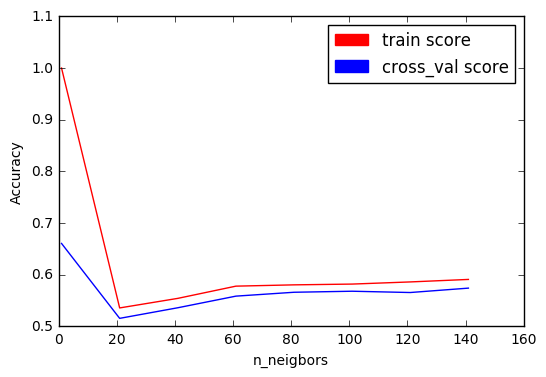

In [45]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.xlabel('n_neigbors')
plt.ylabel('Accuracy')
plt.plot(ns,knn_train_score,'r')
plt.plot(ns,knn_cross_val_score,'b')
red_patch = mpatches.Patch(color='red', label='train score')
blue_patch = mpatches.Patch(color='blue', label='cross_val score')
plt.legend(handles=[red_patch,blue_patch])
plt.show()

### **По графику видно что в данном случае лучшее качество достигается при небольших (< 20) значениях числа соседей**

## Logistic Regression Scores

In [46]:
table2

,C,train,cross_val
0,1.000000e-02,0.589000,0.5360
1,5.179475e-01,0.938667,0.8130
2,2.682696e+01,1.000000,0.8570
3,1.389495e+03,1.000000,0.8535
4,7.196857e+04,1.000000,0.8520
5,3.727594e+06,1.000000,0.8575
6,1.930698e+08,1.000000,0.8580
7,1.000000e+10,1.000000,0.8570


In [114]:
table2.iloc[table2['cross_val'].idxmax(axis=1)]

C            1.930698e+08
train        1.000000e+00
cross_val    8.580000e-01
Name: 6, dtype: float64

**Лучшее качество на валидации ~0.858, на обучении 1**

**Лучшее значение параметра регуляризации C = 193069772.88832456, это очень большое число, при котором модель будет стремиться сделать веса очень маленькими, однако, можно увидеть что при С = ~26 качество модели хуже лишь на несколько тысячных, то есть в качестве параметра регуляризации можно взять и его**

## График зависимости доли правильных ответов от параметра регуляризации С на обучении (красным) и на валидации (синим)

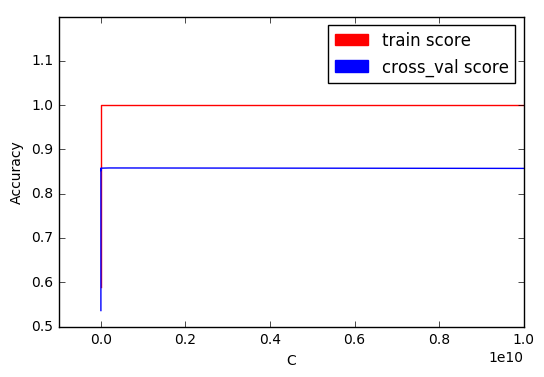

In [49]:
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.plot(cs,logreg_train_score,'r')
plt.plot(cs,logreg_cross_val_score,'b')
plt.xlim(-1000000000,10000000000)
plt.ylim(0.5,1.2)
red_patch = mpatches.Patch(color='red', label='train score')
blue_patch = mpatches.Patch(color='blue', label='cross_val score')
plt.legend(handles=[red_patch,blue_patch])
plt.show()

** По графику видно, что качество практически не менятся при увеличении С **

## MultinimialNB Scores 

In [100]:
table3

,alpha,train,cross_val
0,0.000100,0.999500,0.7665
1,0.000518,0.999500,0.7735
2,0.002683,0.999500,0.7825
3,0.013895,0.997500,0.7980
4,0.071969,0.990667,0.8025
5,0.372759,0.977000,0.8090
6,1.930698,0.940833,0.7720
7,10.000000,0.848833,0.7075


In [102]:
table3['cross_val'].idxmax(axis=1)

5

In [101]:
table3['train'].idxmax(axis=1)

0

In [104]:
print("best cross_val score = ",table3['cross_val'][5])
print("best cross_val alpha = ", table3['alpha'][5])

best cross_val score =  0.809
best cross_val alpha =  0.372759372031


In [105]:
print("best train score = ",table3['train'][0])
print("best train alpha = ", table3['alpha'][0])

best train score =  0.9995
best train alpha =  0.0001


**Для байесовского классификатора лучшее качесвто на валидации 0.809 достигается при alpha = ~0.372, однако, лучшее alpha для обучения = 0.0001 с кчеством почти 100%**

## График зависимости доли правильных ответов байесовского классификатора от alpha  на обучении (красным) и на валидации (синим)

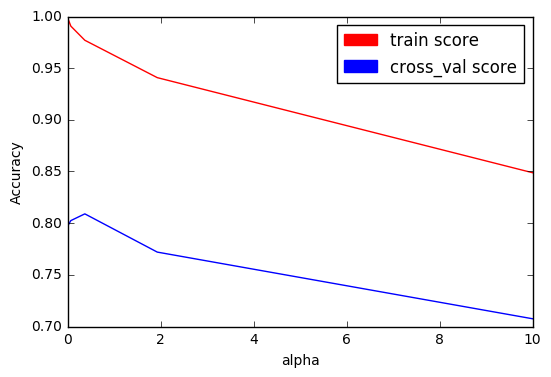

In [55]:
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.plot(alphas,mnb_train_score,'r')
plt.plot(alphas,mnb_cross_val_score,'b')
red_patch = mpatches.Patch(color='red', label='train score')
blue_patch = mpatches.Patch(color='blue', label='cross_val score')
plt.legend(handles=[red_patch,blue_patch])
plt.show()

**По графику видно что качество падает с увеличением alpha**

## Обучим модели с полученными лучшими настройками

In [56]:
NewKNN = KNeighborsClassifier(n_neighbors=1)
NewLogReg = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=193069772.88832456, solver="lbfgs", random_state=12345)
NewMNB = MultinomialNB(alpha=0.372759372031)

In [57]:
NewKNN.fit(X_train_tfidf,y_train)
NewLogReg.fit(X_train_tfidf,y_train)
NewMNB.fit(X_train_tfidf,y_train)

MultinomialNB(alpha=0.372759372031, class_prior=None, fit_prior=True)

In [58]:
newknn_pred = NewKNN.predict(X_test_tfidf)
newlogreg_pred = NewLogReg.predict(X_test_tfidf)
newmnb_pred = NewMNB.predict(X_test_tfidf)

**Доля правильных ответов 1-NN**

In [59]:
accuracy_score(newknn_pred,y_test)

0.63

**Доля правильных ответов логистической регрессии C = 193069772.88832456**

In [60]:
accuracy_score(newlogreg_pred,y_test)

0.86333333333333329

**Доля правльных ответов мультиномиального наивного байесовского классификатора alpha = 0.372759372031**

In [61]:
accuracy_score(newmnb_pred,y_test)

0.81999999999999995

С настроенными гиперпараметрами качество на отложенной выборке немного улучшилось по сравнению с ненастроенными моделями

**Замеры времени**

**Время обучения**

Для 1-NN:

In [62]:
%timeit NewKNN.fit(X_train_tfidf,y_train)

100 loops, best of 3: 2.03 ms per loop


Для Логистической регрессии:

In [63]:
%timeit NewLogReg.fit(X_train_tfidf,y_train)

1 loop, best of 3: 221 ms per loop


Для Байесовского классификатора:

In [64]:
%timeit NewMNB.fit(X_train_tfidf,y_train)

100 loops, best of 3: 6.46 ms per loop


Получилсиь результаты аналогичные результатам в задании 1. КNN обучается быстрее всех, т.к. алгоритму нужно лишь запомнить выборку, логистическая регрессия обучается дольше всех, т.к. ей нужно настроить много весов. 

**Время предсказания**

Для 1-NN:

In [65]:
%timeit NewKNN.predict(X_test_tfidf)

1 loop, best of 3: 213 ms per loop


Для Логистической регрессии:

In [66]:
%timeit NewLogReg.predict(X_test_tfidf)

1000 loops, best of 3: 543 µs per loop


Для Байесовского классификатора:

In [67]:
%timeit NewMNB.predict(X_test_tfidf)

1000 loops, best of 3: 1.61 ms per loop


Результаты снова налогичны первому заднию, KNN требует больше всех времени на предсказание

# N-Gram = 2

## Пусть теперь TfidfVectorizer "кодирует" не только отдельные слова но и словосочетания из двух слов (поставим ngram_range = (1,2))

In [68]:
newvectorizer = TfidfVectorizer(lowercase=True,ngram_range=(1,2))

In [71]:
knn_train_score2 = np.zeros(8)
knn_cross_val_score2 = np.zeros(8)

logreg_train_score2 = np.zeros(8)
logreg_cross_val_score2 = np.zeros(8)

mnb_train_score2 = np.zeros(8)
mnb_cross_val_score2 = np.zeros(8)

In [72]:
for i in range(0,8):
    
    knn = KNeighborsClassifier(n_neighbors=ns[i])
    logreg  = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=cs[i], solver="lbfgs", random_state=12345)
    mnb = MultinomialNB(alpha=alphas[i])
    
    temp_knn_train = list()
    temp_knn_cross = list()
    
    temp_log_train = list()
    temp_log_cross = list()
    
    temp_mnb_train = list()
    temp_mnb_cross = list()
    
    
    for train, test in kf.split(nTexts):
        train_tfidf = newvectorizer.fit_transform(nTexts[train])
        test_tfidf = newvectorizer.transform(nTexts[test])

        knn.fit(train_tfidf,nAns[train]) 
        logreg.fit(train_tfidf,nAns[train])
        mnb.fit(train_tfidf,nAns[train])
        
        temp_knn_train.append(accuracy_score(knn.predict(train_tfidf),nAns[train]))
        temp_knn_cross.append(accuracy_score(knn.predict(test_tfidf),nAns[test]))
        
        temp_log_train.append(accuracy_score(logreg.predict(train_tfidf),nAns[train]))
        temp_log_cross.append(accuracy_score(logreg.predict(test_tfidf),nAns[test]))
        
        temp_mnb_train.append(accuracy_score(mnb.predict(train_tfidf),nAns[train]))
        temp_mnb_cross.append(accuracy_score(mnb.predict(test_tfidf),nAns[test]))
        
    knn_train_score2[i] = np.mean(temp_knn_train)
    knn_cross_val_score2[i] = np.mean(temp_knn_cross)
    
    logreg_train_score2[i] = np.mean(temp_log_train)
    logreg_cross_val_score2[i] = np.mean(temp_log_cross)
    
    mnb_train_score2[i] = np.mean(temp_mnb_train)
    mnb_cross_val_score2[i] = np.mean(temp_mnb_cross)
    
    temp_knn_cross.clear()
    temp_knn_train.clear()
    
    temp_log_cross.clear()
    temp_log_train.clear()

    temp_mnb_cross.clear()
    temp_mnb_train.clear()

In [73]:
table4 = pd.DataFrame()
table5 = pd.DataFrame()
table6 = pd.DataFrame()

In [74]:
table4['n_neighbors'] = ns
table4['train'] = knn_train_score2
table4['cross_val'] = knn_cross_val_score2

table5['C'] = cs
table5['train'] = logreg_train_score2
table5['cross_val'] = logreg_cross_val_score2

table6['alpha'] = alphas
table6['train'] = mnb_train_score2
table6['cross_val'] = mnb_cross_val_score2

## KNN Scores n-gram = 2

In [75]:
table4

,n_neighbors,train,cross_val
0,1,1.000000,0.6585
1,21,0.517667,0.5100
2,41,0.509167,0.5055
3,61,0.512167,0.5100
4,81,0.510667,0.5050
5,101,0.509500,0.5065
6,121,0.508667,0.5065
7,141,0.508833,0.5090


**Лучшее число соседей на обучении и кросс-валидации n_neighbors = 1**

In [116]:
table4.iloc[table4['cross_val'].idxmax(axis=1)]

n_neighbors    1.0000
train          1.0000
cross_val      0.6585
Name: 0, dtype: float64

**Значительного изменеия качества по сравнению с n-gram = 1 нет, лучший результат в данном случае лишь на 1% хуже чем с n_gram = 2, однако при значениях n_neigbors отличных от единицы качество упало.**

## График зависимости доли правильных ответов KNN от n_neighbors на обучении (красным) и на валидации (синим)

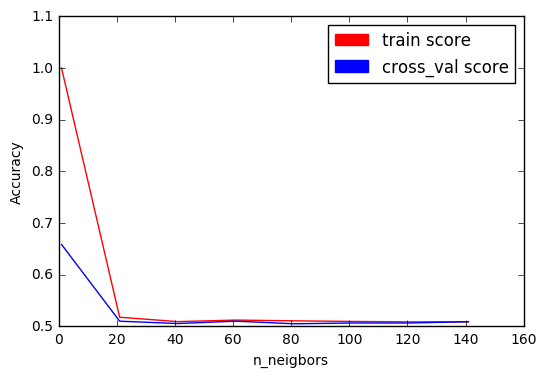

In [82]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.xlabel('n_neigbors')
plt.ylabel('Accuracy')
plt.plot(ns,knn_train_score2,'r')
plt.plot(ns,knn_cross_val_score2,'b')
red_patch = mpatches.Patch(color='red', label='train score')
blue_patch = mpatches.Patch(color='blue', label='cross_val score')
plt.legend(handles=[red_patch,blue_patch])
plt.show()

## Logistic Regression Scores n-gram = 2

In [83]:
table5

,C,train,cross_val
0,1.000000e-02,0.541667,0.5070
1,5.179475e-01,0.978833,0.7850
2,2.682696e+01,1.000000,0.8415
3,1.389495e+03,1.000000,0.8475
4,7.196857e+04,1.000000,0.8495
5,3.727594e+06,1.000000,0.8415
6,1.930698e+08,1.000000,0.8350
7,1.000000e+10,1.000000,0.8350


In [86]:
table5['cross_val'].idxmax(axis=1)

4

In [88]:
table5['C'][4]

71968.567300115144

In [89]:
table5['cross_val'][4]

0.84950000000000003

In [115]:
table5.iloc[table5['cross_val'].idxmax(axis=1)]

C            71968.5673
train            1.0000
cross_val        0.8495
Name: 4, dtype: float64

**С n-gram = 2, лучшее значение коэффициента регуляризации С = 71968.567300115144, при этом качество незначительно хуже чем c n-gram = 1**

## График зависимости доли правильных ответов от параметра регуляризации С на обучении (красным) и на валидации (синим)

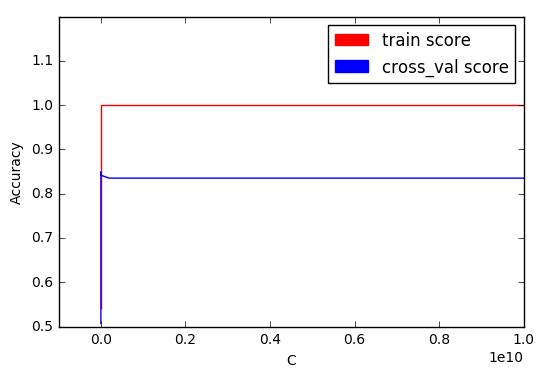

In [91]:
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.plot(cs,logreg_train_score2,'r')
plt.plot(cs,logreg_cross_val_score2,'b')
plt.xlim(-1000000000,10000000000)
plt.ylim(0.5,1.2)
red_patch = mpatches.Patch(color='red', label='train score')
blue_patch = mpatches.Patch(color='blue', label='cross_val score')
plt.legend(handles=[red_patch,blue_patch])
plt.show()

На графике качественных изменений нет

## MultinimialNB Scores n-gram = 2

In [106]:
table6

,alpha,train,cross_val
0,0.000100,1.000000,0.8100
1,0.000518,1.000000,0.8175
2,0.002683,1.000000,0.8235
3,0.013895,1.000000,0.8310
4,0.071969,1.000000,0.8305
5,0.372759,0.999167,0.8235
6,1.930698,0.992000,0.7830
7,10.000000,0.916667,0.6755


In [108]:
table6['cross_val'].idxmax(axis=1)

3

In [107]:
table6['train'].idxmax(axis=1)

0

In [110]:
print("best cross_val score = ",table6['cross_val'][3])
print("best cross_val alpha = ", table6['alpha'][3])

best cross_val score =  0.831
best cross_val alpha =  0.0138949549437


In [111]:
print("best train score = ",table6['train'][0])
print("best train alpha = ", table6['alpha'][0])

best train score =  1.0
best train alpha =  0.0001


**Для байесовского классификатора при n-garm = 2, качество немного улучшилось как на обучении так и на валидации, лучшее значение alpha = ~0.01389**

## График зависимости доли правильных ответов байесовского классификатора от alpha  на обучении (красным) и на валидации (синим)

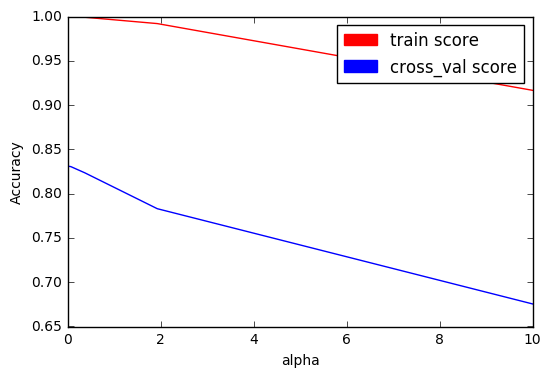

In [112]:
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.plot(alphas,mnb_train_score2,'r')
plt.plot(alphas,mnb_cross_val_score2,'b')
red_patch = mpatches.Patch(color='red', label='train score')
blue_patch = mpatches.Patch(color='blue', label='cross_val score')
plt.legend(handles=[red_patch,blue_patch])
plt.show()

## Обучим модели с полученными лучшими настройками

In [117]:
NewKNN = KNeighborsClassifier(n_neighbors=1)
NewLogReg = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=71968.567300115144, solver="lbfgs", random_state=12345)
NewMNB = MultinomialNB(alpha=0.0138949549437)

In [118]:
newX_train_tfidf = newvectorizer.fit_transform(X_train)
newX_test_tfidf = newvectorizer.transform(X_test)

In [119]:
NewKNN.fit(newX_train_tfidf,y_train)
NewLogReg.fit(newX_train_tfidf,y_train)
NewMNB.fit(newX_train_tfidf,y_train)

MultinomialNB(alpha=0.0138949549437, class_prior=None, fit_prior=True)

In [120]:
newknn_pred = NewKNN.predict(newX_test_tfidf)
newlogreg_pred = NewLogReg.predict(newX_test_tfidf)
newmnb_pred = NewMNB.predict(newX_test_tfidf)

**Доля правильных ответов 1-NN**

In [121]:
accuracy_score(newknn_pred,y_test)

0.625

**Доля правильных ответов логистической регрессии C = 71968.567300115144**

In [122]:
accuracy_score(newlogreg_pred,y_test)

0.85166666666666668

**Доля правльных ответов мультиномиального наивного байесовского классификатора alpha = 0.0138949**

In [123]:
accuracy_score(newmnb_pred,y_test)

0.83499999999999996

С настроенными гиперпараметрами качество на отложенной выборке немного улучшилось по сравнению с ненастроенными моделями

**Замеры времени**

**Время обучения**

Для 1-NN:

In [124]:
%timeit NewKNN.fit(newX_train_tfidf,y_train)

100 loops, best of 3: 5.08 ms per loop


Для Логистической регрессии:

In [125]:
%timeit NewLogReg.fit(newX_train_tfidf,y_train)

1 loop, best of 3: 4.62 s per loop


Для Байесовского классификатора:

In [126]:
%timeit NewMNB.fit(newX_train_tfidf,y_train)

10 loops, best of 3: 49.5 ms per loop


**По-прежнему KNN обучается быстрее всех, Логиситическая регрессия - медленнее всех, однако, легко заметить что все классификаторы стали обучаться дольше так как при ngram_range = (1,2) данных стало больше **

**Время предсказания**

Для 1-NN:

In [127]:
%timeit NewKNN.predict(newX_test_tfidf)

1 loop, best of 3: 346 ms per loop


Для Логистической регрессии:

In [128]:
%timeit NewLogReg.predict(newX_test_tfidf)

100 loops, best of 3: 2.45 ms per loop


Для Байесовского классификатора:

In [129]:
%timeit NewMNB.predict(newX_test_tfidf)

100 loops, best of 3: 7.75 ms per loop


**Как и прежде, Логистическая регрессия требует меньше всех времени на предсказание, KNN больше всех, как и в случае с обучением, при ngram_range = (1,2) на предсказание требуется больше времени **

# Итоговые данные по всем методам для лучших моделей 

## KNN

Лучшее значение n_neighbors = 1

Лучшее значение ngram_range = (1,1)

Лучшее качество на валидации (доля правильных ответов) = 0.66

Время обучения ~2 ms

Время предсказания ~213 ms

## Логистическая регрессия

Лучшее значение C = 193069772.88832456

Лучшее значение ngram_range = (1,1)

Лучшее качество на валидации (доля правильных ответов) =  ~0.858

Время обучения ~221 ms

Время предсказания ~543 µs

## Мультиномиальный наивный байесовский классификатор

Лучшее значение alpha = 0.0138949549437

Лучшее значение ngram_range = (1,2)

Лучшее качество на валидации (доля правильных ответов) =  ~0.831

Время обучения ~49.5 ms

Время предсказания ~7.75 ms

# Выводы

1) На обучении все модели показывали идеальное или почти идеальное качество (при подобранных гиперпараметрах). На валидации и отложенной выборке логистическая регрессия показала лучшие результаты, однако стоит заметить, что байесовский классификатор оказался лишь незначительно хуже (в пределах 3%) логистической регрессии. Так что можно сказать, что логистическая регрессия и байесовский классификатор показали примерно одинаковое качество, намного лучше чем у модели KNN, что по всей видимости связано с тем что у этих моделей есть куда более глубокое теоритическое обоснование чем у KNN. 

2) Разница в качестве на валидации и обучении конечно же очень большая. Все модели показывали идеальное качество на тех данных на которых они учились, поскольку, по сути, во время обучения их переметры настраивались так чтобы выдавать правильные ответы на объекты содержащиеся в обучающей выборке. Качество же на валидации было заметно ниже, оно зависит от обощающей способности модели, обусловленной выбором параметров и гиперпараметров и эффективностью модели для данной задачи в целом. 

3) С выставленным параметром ngram_range = (1,2) TfidfVectorizer стал строить tf-idf таблицы не только для одиночных слов содержащихся в текстах, но и для словосочетаний из двух слов. При переходе от n-gram=1 к n-gram=2 значительного изменения качества, оно совсем незначительно упало для KNN и логистической регрессии и незначительно увеличилось для байесовского классификатора, по всей видимости, добавление словосочетаний в таблицы не дало новых значащих признаков для KNN и логистической регрессии, но байесовский классификатор смог найти в них новые более сложные зависимости.

4) В данном случае Логистическая регрессия - классификатор, который обучался дольше всех, дал наилучшее качество. Дольше всех обучается логистическая регрессия так как, ей необходимо настроить большое количество параметров (весов) градиентным спуском. KNN делает предсказание дольше всех, для каждого предсказания ему нужно вычислить расстояние до всех имеющихся в обучающей выборке, и отсортировав выбрать K ближайших, это ресурсоемуие операции.